Tue Oct 13 00:12:33 2020

burgers_time_viscous_test:
  FENICS/Python version
  Solve the time-dependent 1d viscous Burgers equation.

  Number of elements is 32
  Viscosity set to 0.05

Reached final time.

burgers_time_viscous_test:
  Normal end of execution.

Tue Oct 13 00:12:34 2020


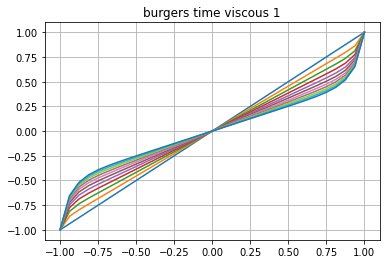

In [6]:
from fenics import *

def burgers_time_viscous ( e_num, nu ):

    #*****************************************************************************80
    #
    ## burgers_time_viscous, 1D time-dependent viscous Burgers equation.
    #
    #  Discussion:
    #
    #    dudt - nu u" + u del u = 0, 
    #    -1 < x < 1, 0 < t
    #    u(-1,t) = -1, u(1,t) = 1
    #    u(x,0) = x
    #
    #    This equation is nonlinear in U.
    #
    #  Licensing:
    #
    #    This code is distributed under the GNU LGPL license.
    #
    #  Modified:
    #
    #    21 October 2018
    #
    #  Author:
    #
    #    John Burkardt
    #
    #  Parameters:
    #
    #    Input, integer E_NUM, the number of elements to use.
    #
    #    Input, real NU, the viscosity, which should be positive.
    #    The larger it is, the smoother the solution will be.
    #
    import matplotlib.pyplot as plt

    print ( '' )
    print ( '  Number of elements is %d' % ( e_num ) )
    print ( '  Viscosity set to %g' % ( nu ) )
    #
    #  Create a mesh on the interval [0,+1].
    #
    x_left = -1.0
    x_right = +1.0
    mesh = IntervalMesh ( e_num, x_left, x_right )
    #
    #  Define the function space to be of Lagrange type
    #  using piecewise linear basis functions.
    #
    V = FunctionSpace ( mesh, "CG", 1 )

    #
    #  Define the boundary conditions.
    #  if X <= XLEFT + eps, then U = U_LEFT
    #  if X_RIGHT - eps <= X, then U = U_RIGHT
    #
    u_left = -1.0
    def on_left ( x, on_boundary ):
        return ( on_boundary and near ( x[0], x_left ) )
    bc_left = DirichletBC ( V, u_left, on_left )

    u_right = +1.0
    def on_right ( x, on_boundary ):
        return ( on_boundary and near ( x[0], x_right ) )
    bc_right = DirichletBC ( V, u_right, on_right )

    bc = [ bc_left, bc_right ]
    #
    #  Define the initial condition.
    #
    u_init = Expression ( "x[0]", degree = 1 )
    #
    #  Define the trial functions (u) and test functions (v).
    #
    u = Function ( V )
    u_old = Function ( V )
    v = TestFunction ( V )
    #
    #  Set U and U0 by interpolation.
    #
    u.interpolate ( u_init )
    u_old.assign ( u )
    #
    #  Set the time step.
    #  We need a UFL version "DT" for the function F,
    #  and a Python version "dt" to do a conditional in the time loop.
    #
    DT = Constant ( 0.01 )
    dt = 0.01
    #
    #  Set the source term.
    #
    f = Expression ( "0.0", degree = 0 )
    #
    #  Write the function to be satisfied.
    #
    n = FacetNormal ( mesh )
    #
    #  Write the function F.
    #
    F = \
    ( \
    dot ( u - u_old, v ) / DT \
    + nu * inner ( grad ( u ), grad ( v ) ) \
    + inner ( u * u.dx(0), v ) \
    - dot ( f, v ) \
    ) * dx
    #
    #  Specify the jacobian.
    #
    J = derivative ( F, u )
    #
    #  Do the time integration.
    #
    k = 0
    t = 0.0

    t_plot = 0.0
    t_final = 1.0

    while ( True ):

        if ( k % 10 == 0 ):
            plot ( u, title = ( 'burgers time viscous %g' % ( t ) ) )
            plt.grid ( True )
            filename = ( 'burgers_time_viscous_%d.png' % ( k ) )
            #       plt.savefig ( filename )
            #       print ( 'Graphics saved as "%s"' % ( filename ) )
            #       plt.close ( )
            t_plot = t_plot + 0.1

        if ( t_final <= t ):
            print ( '' )
            print ( 'Reached final time.' )
            break

        k = k + 1
        t = t + dt

        solve ( F == 0, u, bc, J = J )

        u_old.assign ( u )

    return

def burgers_time_viscous_test ( ):

    #*****************************************************************************80
    #
    ## burgers_time_viscous_test tests burgers_time_viscous.
    #
    #  Licensing:
    #
    #    This code is distributed under the GNU LGPL license.
    #
    #  Modified:
    #
    #    21 October 2018
    #
    #  Author:
    #
    #    John Burkardt
    #
    import time

    print ( time.ctime ( time.time() ) )
    #
    #  Report level = only warnings or higher.
    #
    level = 30
    set_log_level ( level )

    print ( '' )
    print ( 'burgers_time_viscous_test:' )
    print ( '  FENICS/Python version' )
    print ( '  Solve the time-dependent 1d viscous Burgers equation.' )

    e_num = 32
    nu = 0.05
    burgers_time_viscous ( e_num, nu )
    #
    #  Terminate.
    #
    print ( "" )
    print ( "burgers_time_viscous_test:" )
    print ( "  Normal end of execution." )
    print ( '' )
    print ( time.ctime ( time.time() ) )
    return

if ( __name__ == '__main__' ):

    burgers_time_viscous_test ( )